97 64 30 28
101 9 90 81


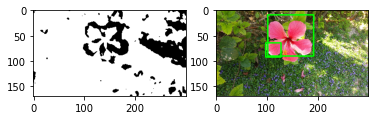

In [1]:
import cv2
import matplotlib.pyplot as plt

#이미지 읽어 들이고 크기 변경하기
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

#색공간 변경하기
gray = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

#화면 왼쪽에 변환한 이미지 출력하기
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap = "gray")

#윤곽 검출하기
cnts = cv2.findContours(im2,
                       cv2.RETR_LIST,
                       cv2.CHAIN_APPROX_SIMPLE)[1]

#검출한 윤곽 그리기
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    
#너무 크거나, 너무 작은 부분 제거하기
    if (w < 30 or w > 200):
        continue
    
    print(x, y, w, h) #결과 출력하기
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#화면 오른쪽에 결과 출력하기
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png",dpi = 200)
plt.show()

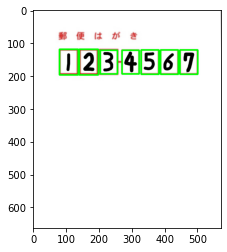

In [2]:
#엽서에서 우편 번호 영역 검출하기
import cv2
import matplotlib.pyplot as plt

#엽서 이미지에서 우편 번호를 추출하는 함수
def detect_zipno(fname):
    #이미지 읽어 들이기
    img = cv2.imread(fname)
    
    #이미지 크기 구하기
    h, w = img.shape[:2]
    
    #이미지의 오른쪽 윗부분만 추출하기
    img = img[0:h//2, w//3:]
    
    #이미지 이진화하기
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    #윤곽 검출하기
    cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
    
    #추출한 이미지에서 윤곽 추출하기
    result = []
    
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        #너무 크거나 너무 작은 부분 제거하기
        if not(50 < w < 70):
               continue
        result.append([x, y, w, h])
        
    #추출한 윤곽을 위치에 따라 정렬하기
    result = sorted(result, key = lambda x : x[0])
    
    #추출한 윤곽이 너무 가까운것들 제거하기
    result2 = []
    lastx = -100
    
    for x, y, w, h in result:
        if ((x - lastx) < 10):
            continue
        result2.append([x,y,w, h])
        lastx = x
    
    #초록색 테두리 출력하기
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    return result2, img


if __name__ == '__main__':
    #이미지를 저장해서 우편번호 추출하기
    cnts, img = detect_zipno("hagaki1.png")
    
    #결과 출력하기
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi = 200)
    plt.show()

In [3]:
#추출한 숫자 이미지 판정하기
from detect_zip import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib

#학습한 데이터 읽어 들이기
clf = joblib.load("digits.pkl")

#이미지에서 영역 읽어들이기
cnts, img = detect_zipno("hagaki1.png")

#읽어들인 데이터 출력하기
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    #윤곽으로 감싼부분을 작게 만들기
    x = x + 8
    y = y + 8
    w = w - 16
    h = h - 16
    
    #이미지 데이터 추출하기
    im2 = img[y:y+h, x:x+w]

    #데이터를 학습에 적합하게 변환하기
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) #그레이스케일
    im2gray = cv2.resize(im2gray, (8, 8)) #크기변경
    im2gray = 15 - im2gray // 16 #이진화
    im2gray = im2gray.reshape((-1, 64)) #차원변환

    #데이터 예측하기
    res = clf.predict(im2gray)

    #출력하기
    plt.subplot(1, 7, i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()